In [77]:
import torchvision
import torch
import torchvision.transforms as transforms
import os
import matplotlib.pyplot as plt
import numpy as np

In [79]:
train_dataset_path = r'C:\Users\Shashwat\OneDrive\monkeys\training\training'
test_dataset_path  = r'C:\Users\Shashwat\OneDrive\monkeys\validation\validation'

In [81]:
# image = (image - mean) / std
mean = [0.4363, 0.4328, 0.329]
std = [0.2129, 0.2075, 0.2039]

train_transforms = transforms.Compose ([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(torch.Tensor(mean), torch.Tensor(std))
])

test_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(torch.Tensor(mean), torch.Tensor(std))
])

In [83]:
train_dataset =  torchvision.datasets.ImageFolder(root = train_dataset_path, transform = train_transforms)
test_dataset = torchvision.datasets.ImageFolder(root = test_dataset_path, transform  = test_transforms)

In [85]:
def show_transformed_images(dataset):
    loader = torch.utils.data.DataLoader(dataset, batch_size =6, shuffle=True)
    batch = next(iter(loader))
    images, labels = batch
    grid = torchvision.utils.make_grid(images,nrow=3)
    plt.figure(figsize=(11,11))
    plt.imshow(np.transpose(grid, (1,2,0)))
    print('labels', labels)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


labels tensor([8, 0, 5, 3, 6, 8])


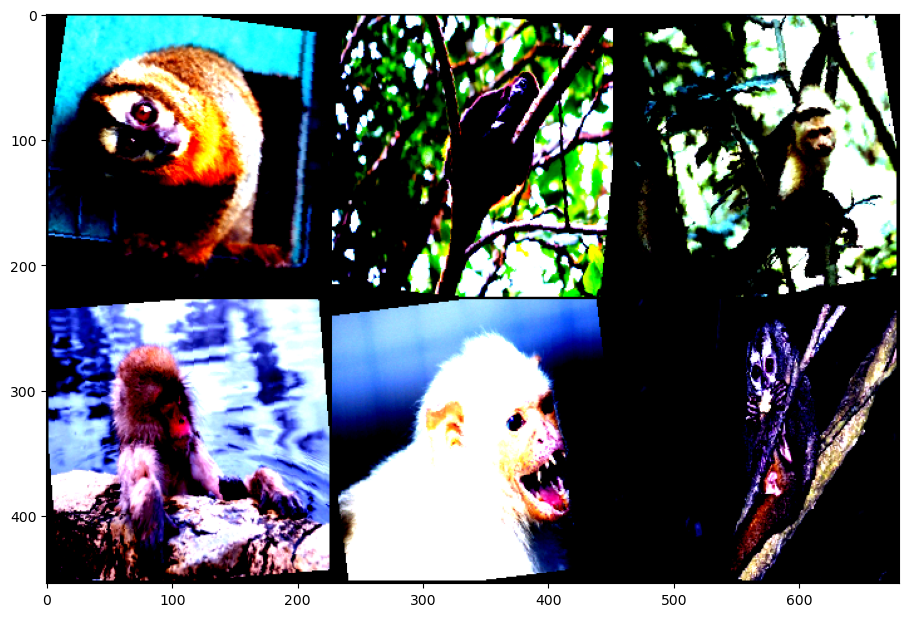

In [87]:
show_transformed_images(train_dataset)

In [88]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

In [91]:
def set_device():
    if torch.cuda.is_available():
        dev = "cuda:0"
    else:
        dev = "cpu"
    return torch.device(dev)

In [93]:
def train_nn(model, train_loader, test_loader, criterion, optimizer, n_epochs):
    device = set_device()
    for epoch in range(n_epochs):
        print("Epoch number %d" % (epoch+1))
        model.train()
        running_loss = 0.0
        running_correct = 0.0
        total = 0

    for data in train_loader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        total += labels.size(0)

        optimizer.zero_grad()
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        running_correct += (labels==predicted).sum().item()
    epoch_loss = running_loss/len(train_loader)
    epoch_acc = 100.00 * running_correct/total

    print(f"   -Training dataset. Got {running_correct} out of {total} images correctly ({epoch_acc:.3f}%). Epoch loss: {epoch_loss:.3f}")

    evaluate_model_on_test_set(model, test_loader)
    print("Finished")
    return model

In [95]:
def evalulate_model_on_test_set(model, test_loader):
    model.eval()
    predicted_correctly_on_epoch = 0
    total = 0
    device = set_device()
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)
            total += labels.size(0)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            predicted_correctly_on_epoch += (predicted == labels).sum().item()
    epoch_acc = 100.0 * predicted_correctly_on_epoch / total
    print(f"-Testing dataset. Got {predicted_correctly_on_epoch} out of {total} images correctly ({epoch_acc:.3f}%)")


In [97]:
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim

resnet18_model = models.resnet18(pretrained=False)
num_ftrs = resnet18_model.fc.in_features
number_of_classes = 10
resnet18_model.fc = nn.Linear(num_ftrs, number_of_classes)
device = set_device()
resnet_18_model = resnet18_model.to(device)
loss_fn = nn.CrossEntropyLoss()

optimizer = optim.SGD(resnet18_model.parameters(), lr=0.01, momentum=0.9, weight_decay=0.003)


In [ ]:
train_nn(resnet18_model, train_loader, test_loader, loss_fn, optimizer, 150)

Epoch number 1
Epoch number 2
Epoch number 3
Epoch number 4
Epoch number 5
Epoch number 6
Epoch number 7
Epoch number 8
Epoch number 9
Epoch number 10
Epoch number 11
Epoch number 12
Epoch number 13
Epoch number 14
Epoch number 15
Epoch number 16
Epoch number 17
Epoch number 18
Epoch number 19
Epoch number 20
Epoch number 21
Epoch number 22
Epoch number 23
Epoch number 24
Epoch number 25
Epoch number 26
Epoch number 27
Epoch number 28
Epoch number 29
Epoch number 30
Epoch number 31
Epoch number 32
Epoch number 33
Epoch number 34
Epoch number 35
Epoch number 36
Epoch number 37
Epoch number 38
Epoch number 39
Epoch number 40
Epoch number 41
Epoch number 42
Epoch number 43
Epoch number 44
Epoch number 45
Epoch number 46
Epoch number 47
Epoch number 48
Epoch number 49
Epoch number 50
Epoch number 51
Epoch number 52
Epoch number 53
Epoch number 54
Epoch number 55
Epoch number 56
Epoch number 57
Epoch number 58
Epoch number 59
Epoch number 60
Epoch number 61
Epoch number 62
Epoch number 63
E